## Attempt to locate ca3 sessions by the presence of theta power

This was not successful as there was no clear pattern in power over sessions

In [1]:
%cd ..

D:\ryanh\github\tg_ripples


In [51]:
from neurodsp.spectral import compute_spectrum, rotate_powerlaw
from tg_ripples import functions
import os
import glob as glob
import numpy as np
import matplotlib.pyplot as plt
from neurodsp.plts.spectral import plot_power_spectra
from fooof import FOOOF


In [183]:
path = r'F:\Projects\ClarkP30_Recordings\Data\ATN07'

In [184]:
files = glob.glob(path+'/**/*.lfp')

In [185]:
folders = glob.glob(path+'/*/')

In [201]:
def get_good_channels(shank):
    #extract values from dictionary
    an_array = np.array(list(shank.values()),dtype=object)
    
    #loop through array to pull out individual channel        
    good_ch = []
    for i in range(len(an_array)):
        for x in range(len(an_array[i])):
            good_ch.append(an_array[i][x])
        
    return good_ch

def load_lfp(path):
    # load xml which has channel & fs info
    channels,fs,shank = functions.loadXML(path)

    # get good channels
    good_ch = get_good_channels(shank)

    # load .lfp
    lfp,ts = functions.loadLFP(glob.glob(path +'\*.lfp')[0], n_channels=channels,
                     channel=good_ch, frequency=fs,
                     precision='int16')
    return lfp,ts,fs

def any_theta(lfp,fs):
    theta=[]
    pw=[]
    for sig in lfp.T:
        freq_mean, psd_mean = compute_spectrum(sig, fs, method='welch', avg_type='mean', nperseg=fs*2)
        
        fm = FOOOF(verbose=False)

        idx = (freq_mean >= 3) & (freq_mean <= 50)
        fm.add_data(freq_mean[idx], psd_mean[idx])
        fm.fit()
        
        idx = (fm.peak_params_[:,0] >= 4) & (fm.peak_params_[:,0] <=12)
        theta.append(np.any(idx))
        if np.any(idx):
            pw.append(np.nanmax(fm.peak_params_[idx,1]))
        else:
            pw.append(np.nan)                    
    return theta,pw

In [202]:
power=[]
for path in folders:
    print(path)
    lfp,ts,fs = load_lfp(path)
    theta,pw = any_theta(lfp,fs)
    power.append(np.mean(pw))

F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-07-12_18-24-41\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-07-13_16-18-14\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-07-17_14-12-15\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-07-23_17-33-44\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-07-24_17-12-03\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-07-30_16-17-37\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-08-02_14-54-18\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-08-03_11-49-58\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-08-06_17-19-35\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-08-07_14-30-14\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-08-08_13-54-18\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-08-09_17-31-25\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-08-20_09-52-36\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-09-14_10-31-10\
F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-09-18_16-00-54\
F:\Projects\ClarkP30_Recordings\Data\ATN

In [203]:
power

[0.2046350703369183,
 0.3166165088094693,
 0.4440888762293588,
 nan,
 0.29419690312324054,
 nan,
 0.45436403799718955,
 0.18752859176418574,
 nan,
 0.29531696860781415,
 nan,
 nan,
 nan,
 0.3835732756260372,
 0.38920013122451513,
 0.5479115846564493,
 0.3050503130780197,
 0.3690091383839546,
 nan]

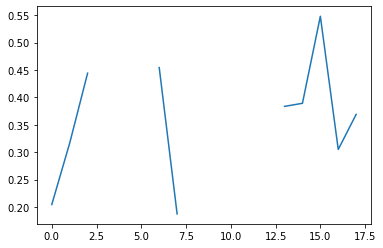

In [204]:
plt.plot(power)

In [63]:
def plot_power(lfp,fs,ax):
    
    for sig in lfp.T:
        freq_mean, psd_mean = compute_spectrum(sig, fs, method='welch', avg_type='mean', nperseg=fs*2)
        
        plot_power_spectra(freq_mean[:200],psd_mean[:200],ax=ax)
        
    plt.axvspan(4, 12, alpha=0.2, color='#fec287', zorder=-1000)

In [190]:
lfp,ts,fs = load_lfp(r'F:\Projects\ClarkP30_Recordings\Data\ATN07\2018-09-27_16-35-19')

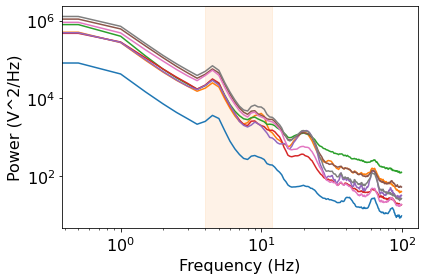

In [191]:
plt.figure()
ax = plt.gca()
plot_power(lfp,fs,ax)

In [192]:
theta=[]
pw=[]
for sig in lfp.T:
    freq_mean, psd_mean = compute_spectrum(sig, fs, method='welch', avg_type='mean', nperseg=fs*2)

    fm = FOOOF(verbose=False)

    idx = (freq_mean >= 3) & (freq_mean <= 50)
    fm.add_data(freq_mean[idx], psd_mean[idx])
    fm.fit()

    idx = (fm.peak_params_[:,0] >= 4) & (fm.peak_params_[:,0] <=12)
    theta.append(np.any(idx))

    pw.append(np.max(fm.peak_params_[idx,1]))

In [193]:
idx = (fm.peak_params_[:,0] >= 4) & (fm.peak_params_[:,0] <=12)
idx

array([ True,  True, False, False])

In [194]:
theta = any_theta(lfp,fs)
theta

([True, True, True, True, True, True, True, True],
 [0.6546541067231098,
  0.5318528911918476,
  0.5546961127567309,
  0.5869824678853037,
  0.5388504939545538,
  0.5106059163924046,
  0.5088977570194233,
  0.4967529313282206])

In [195]:
sig = lfp[:,0]

In [196]:
freq_mean, psd_mean = compute_spectrum(sig, fs, method='welch', avg_type='mean', nperseg=fs*2)


In [197]:
fm = FOOOF(verbose=False)

idx = (freq_mean >=0) & (freq_mean <= 50)
fm.add_data(freq_mean[idx], psd_mean[idx])
fm.fit()

In [198]:
np.any((fm.peak_params_[:,0] >= 4) & (fm.peak_params_[:,0] <=12))

True

In [199]:
fm.peak_params_[:,0]

array([ 4.7261171 , 10.61480481, 43.58238027])

Peak parameters: 
 [[ 4.7261171   0.57403733  1.61481557]
 [10.61480481  0.15676436  2.71151678]
 [43.58238027  0.31110973  9.88791589]] 



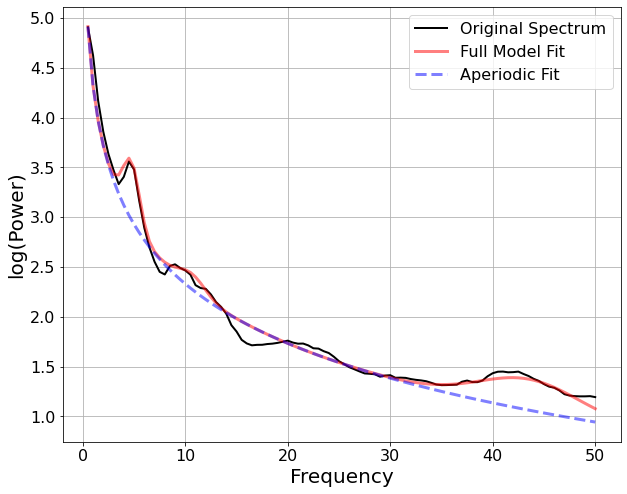

In [200]:

fm.plot()
print('Peak parameters: \n', fm.peak_params_, '\n')


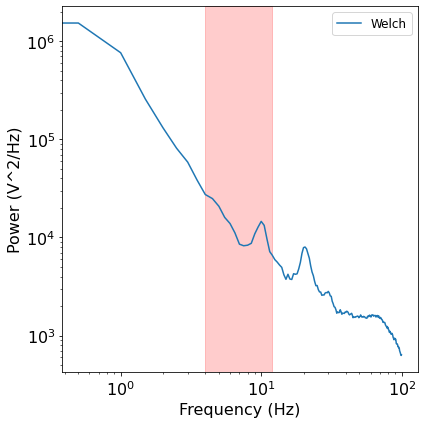

In [170]:
# Plot the power spectra
plot_power_spectra(freq_mean[:200],
                   psd_mean[:200],
                   'Welch')
plt.axvspan(4, 12, alpha=0.2, color='red', zorder=-1000) # #fec287